<a href="https://colab.research.google.com/github/umkarasi/Rope/blob/master/CT10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the required Libraries**

---



In [0]:
import csv
import numpy as np
from numpy import genfromtxt
from numpy  import array
import sys
from scipy import signal
import matplotlib.pyplot as plt

**Read data from Google drive**

---

*   Install PyDrive
*   Authenticate and access Google drive








In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


**List available files in Google drive**

---



In [0]:
file_list = drive.ListFile({'q': "'18g3wfkIfVQhLBcKPXXnqKUC57c8HSOMg' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: scope_43, id: 1DACakp2ehKy2YjljYZzOftYPIZNPJaZAZXBjIGQJWoc
title: scope_29, id: 1X0rZcqJMNFwUcnvCC7CMSnjttmmJH3ItP9D3P567kHg
title: scope_9.csv, id: 1zmf2Z8oHywCaE7TZQATkzPKh7EFzoayl
title: scope_8.csv, id: 1CgLBn1r4Huq74kR8u-sVbhunQC-zw_4f
title: scope_7.csv, id: 1Hqgsy_akVXdfM8-lu3HmVZOMENtvR4OX
title: scope_6.csv, id: 17ZindgMlQaWnShQArNaJ_Y75lmJOysRC
title: scope_44.png, id: 1XHiAWH1LmDizx-k6d7dK2PpnzrRwi0Wn
title: scope_42.png, id: 1CjZg435C6uoxPQQsddwYGAUO9T5u08d8
title: scope_43.csv, id: 1rzt8sZ5Ht5Qs2D2Y9-EORt9rbWC6U7Dm
title: scope_5.csv, id: 1__2B4VULTfF_jktc-rFJfJAU9kN-o6Bz
title: scope_41.csv, id: 1UZvjpgG6-8dJY7egvhSBMB9rvfz1Lu9F
title: scope_4.csv, id: 1dYEue2MZHTwi-OhDR3dI5X8VZqPcm3_V
title: scope_36.png, id: 180BRRPDJ-D82NDRV7c6AAaeum8xgkzxw
title: scope_39.csv, id: 10ZEJ4X6cB5vTf_e-QllOFQFRunRFtlS0
title: scope_40.png, id: 11QxXWGd_vne1cS6e-zJRjDUZMvIU_4W4
title: scope_37.csv, id: 1wcy41_e0ScSRUZOwP2izfyyElk_-TUfh
title: scope_35.csv, id: 1ebw9od1zMyWjAu1BeeIMnb

**Read data from .CSV file**

---



In [0]:
downloaded = drive.CreateFile({'id': '18e8Q83JpsBt0HN_lXKBHvwjhQpPqs6eL'})
downloaded.GetContentFile('scope_27.csv')
data = genfromtxt('scope_27.csv', delimiter=',')

#v1 is the primary current
#v2 is the output voltage
#t is the time

t = data[2:2002,0:1]*1 #Time vector in seconds
t1=1000000*t #Time vector in micro-seconds

v1 = data[2:2002,1:2]*100  # 100 is to compensate the scaling done by oscilescope probe
v2 = data[2:2002,2:3]

Ts=t[100]-t[99] # Sample Time
Fs=1/Ts # sampling Frequency
FNy=Fs/2 # Nyquist Frequncy

print('Data read from .CSV file............\n')
print('Sampling Time (us):',round(float(1e6*Ts),4))
print('Sampling Frequency(MHz) :',round(float(Fs/1e6),2))
print('Nyquist Frequency(MHz) :',round(float(FNy/1e6),2))

Data read from .CSV file............

Sampling Time (us): 0.1
Sampling Frequency(MHz) : 10.0
Nyquist Frequency(MHz) : 5.0


**Plot the primary current and smoothed primary current**

---



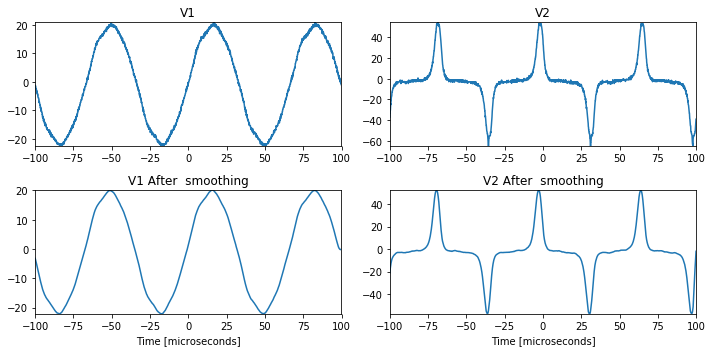

In [0]:
def runningMean(x, N):# function to calculate moving average of a signal
    y = np.zeros((len(x),))
    for ctr in range(len(x)):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N
  
v1m=runningMean(v1,20)
v2m=runningMean(v2,20)

fig = plt.figure(figsize=(10,5))
plt.subplot(2, 2, 1)
plt.plot(t1, v1)
plt.title('V1')
plt.axis([t1[0],t1[1999], min(v1), max(v1)])
plt.subplot(2, 2, 3)
plt.plot(t1, v1m)
plt.title('V1 After  smoothing')
plt.axis([t1[0], t1[1999], min(v1m,), max(v1m,)])
plt.xlabel('Time [microseconds]')
plt.subplot(2, 2, 2)
plt.plot(t1, v2)
plt.title('V2')
plt.axis([t1[0],t1[1999], min(v2), max(v2)])
plt.subplot(2, 2, 4)
plt.plot(t1, v2m)
plt.title('V2 After  smoothing')
plt.axis([t1[0], t1[1999], min(v2m,), max(v2m,)])
plt.xlabel('Time [microseconds]')

plt.tight_layout()
plt.show()

**Parameters of the ferrite coil**

---



In [0]:
Ar=1.75e-4 #Cross section area of the coil
Ns=3 #Secondary winding turns 
Np=1 #primary winding turns
l=.17 #Mean flux path length

Ks1=7e-5 # JA theory parameter of the core (k)
B1=0.0096 # shoulder adjustment of the BH curve proposed by Prof Annakkage
Ms=1.53e6 #Saturation magnetizationm
C=0.1  # Domain flexing parameter of JA model
A1=2.5e-5 #Inter domain coupling parameter of JA model
M0=4*3.14159e-7 #Permeability in vaccum
A=8.0 #JA model parameter A for the Langevin function
Rd=12.9e-10

**Function to calculate $\frac{dM}{dH}$**

---


*   Calculate $M_{an}-M$
*   Calculate $\frac{dM_{an}}{dH_e}$
*$const1=\frac{\delta k }{\mu_0}  -\frac{\alpha(M_{an}-M)}{1-c}$
*$const2=\frac{M_{an}(t)-M(t) }{const1}$
*$const3=c\frac{M_{an} }{dH_e} +const2$
*$const4=1-{\alpha}c\frac{M_{an} }{dH_e}$
*$const5=1-{R_d}\frac{dH} {dt}$     Where, $R_d$ is the parameter that controls the frequency dependency of the BH curve
* Calcutate $\frac{dM}{dH}$  
$\frac{dM}{dH} = (const3-const2)/const4 \\ when  (M_{an}-M)\delta >0 $
$\frac{dM}{dH} = const3/const4  \\when  (M_{an}-M)\delta <0$

* $\frac{dM}{dH}_{dynamic} =\frac{\frac{dM}{dH}_{static}}{const5}$



In [0]:
def slope(Ms,Hei,Ts,k1,A1,Mi,DH,rd1,Diri,C,M0,A):
  coth=np.cosh(Hei/A)/np.sinh(Hei/A)
  x=A/Hei
  MN=Ms*(coth-x)
  dMn=Ms*(((1-coth**2)*(1/A))+A*(1/(Hei)**2))
  
  if np.abs(Hei)<Ts:
    MN=0
    dMn=(1/3)*A
  
  Const1=(Diri*k1/M0)-A1*((MN-Mi)/(1-C))
  Const2=(MN-Mi)/Const1
  Const3=C*dMn+Const2
  Const4=1-A1*C*dMn
 
  if DH>=0:
    Const5=1+rd1*(DH/Ts)*1
  else:
    Const5=1-rd1*(DH/Ts)*1

  if (Mi-MN)*Diri>0.0:
    s1t=(Const3-Const2)/Const4
  else:
    s1t=Const3/Const4
    
  s1= s1t/(Const5*1)
  C5i=Const5
  return s1


**Function to initialize varibles and run the simulation**

---



*   Calculate the change in $Ip$
*   Calculate the new $H$
*    Determine the direction of $H$ (increasing or decreasing)
*    Calculate the $k_{modified}$ for shoulder adjusment proposed by Prof. Annakage
* Use the function defined above to determine calculate $\frac{dM}{dH}$
* Caculate $\Delta M$ for this time step
* Calculate new $M$
*Calculate new$B$
*Calculate new $H_e$
*Calculate  the output voltage $V_{coil}$









In [0]:
def simrun(Ip,rd,Tst):
  H=np.zeros(2000)
  He=np.zeros(2000)
  V=np.zeros(2000)
  He=np.zeros(2000)
  B=np.zeros(2000)
  M=np.zeros(2000)
  Delta=np.zeros(2000)
  Is1=np.zeros(2000)
  Ip1=np.zeros(2000)
  Dir=np.zeros(2000)
  C5=np.ones(2000)
  DIp=0.0
  DH=0.0
  
  mod=(1+rd*rd*2.5e11)
  mod=1
 
  
  
  for i in range(1,len(Ip)-1):
    DIp=(Ip[i]-Ip[i-1])
    DH=(Np/l)*DIp
    H[i]=H[i-1]+DH
  
    if DH>=0.0:
      Dir[i]=1
    else:
      Dir[i]=-1

    if H[i]*Dir[i]>0.0:
      k1=Ks1*(1-B1*(M[i-1]/Ms)**2)
    else:
      k1=Ks1*(1+0*(M[i-1]/Ms)**2)
     
    s=slope(Ms,He[i-1],Tst,k1,A1,M[i-1],DH,rd,Dir[i],C,M0,A)
 
    Dm=s*DH
 
    M[i]=M[i-1]+Dm
    B[i]=M0*(H[i]+M[i])*mod
    He[i]=H[i]+A1*M[i]
    V[i]=DH*(1+s)*Ns*Ar*M0*(1/Tst)
   
  return B,H,V

**Run the simulation**


---



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Text(0, 0.5, 'Flux density B (T) ')

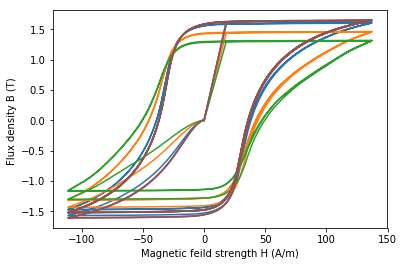

In [0]:
Rd=1*12.9e-9
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Rd=5*12.9e-9
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Rd=12.9e-8
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Rd=12.9e-10
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Rd=12.9e-11
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Rd=12.9e-12
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Text(0, 0.5, 'Flux density B (T) ')

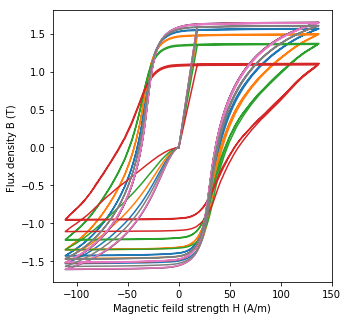

In [0]:
Rd=12.9e-9
Ts=0.5e-7

B,H,V=simrun(v1m,Rd,Ts)
fig = plt.figure(figsize=(5,5))
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Ts=0.25e-7
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')


Ts=.125e-7
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Ts=.05e-7
B50,H50,V=simrun(v1m,Rd,Ts)
plt.plot(H50,B50)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Ts=1e-4
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Ts=1e-5
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Ts=1e-6
B,H,V=simrun(v1m,Rd,Ts)
plt.plot(H,B)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')

Ts=1e-7
B1,H1,V=simrun(v1m,Rd,Ts)
plt.plot(H1,B1)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')



**Plot the (t,H), (t,B),(H,B)**

---



Text(0, 0.5, 'Flux density B (T) ')

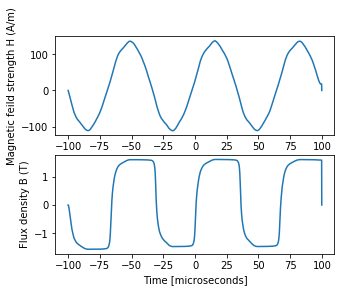

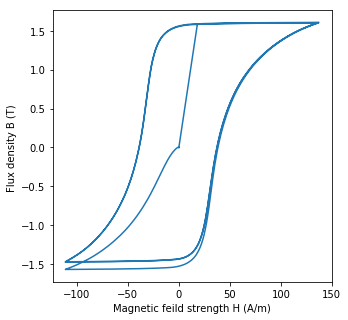

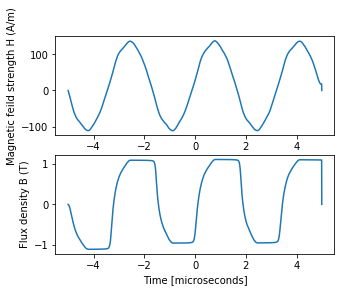

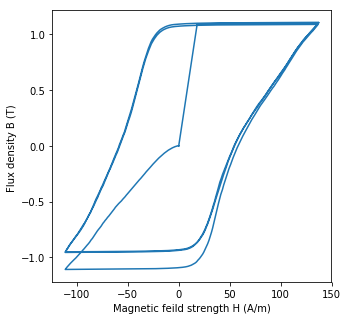

In [0]:
fig = plt.figure(figsize=(5,4))
plt.subplot(2, 1, 1)
plt.plot(t1,H1)
plt.xlabel('Time [microseconds]')
plt.ylabel('Magnetic feild strength H (A/m)')
plt.subplot(2, 1, 2)
plt.plot(t1,B1)
plt.xlabel('Time [microseconds]')
plt.ylabel('Flux density B (T)')
fig = plt.figure(figsize=(5,5))
plt.plot(H1,B1)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')


fig = plt.figure(figsize=(5,4))
plt.subplot(2, 1, 1)
plt.plot(t1*.05,H50)
plt.xlabel('Time [microseconds]')
plt.ylabel('Magnetic feild strength H (A/m)')
plt.subplot(2, 1, 2)
plt.plot(t1*.05,B50)
plt.xlabel('Time [microseconds]')
plt.ylabel('Flux density B (T)')
fig = plt.figure(figsize=(5,5))
plt.plot(H50,B50)
plt.xlabel('Magnetic feild strength H (A/m)')
plt.ylabel('Flux density B (T) ')
